<h2> II. Programming and critical analysis [11v]
                           
<h4> In the next exercise you will use the accounts.csv dataset. This dataset contains account details
of bank clients, and the target variable yis binary (‘has the client subscribed a term deposit?’).
Select the first 8 features and remove duplicates and null values.


<h5>Hint: You can use get_dummies() to change the feature type (e.g. pd.get_dummies(data,
drop_first=True)).



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('accounts.csv')
x = data.drop('deposit', axis=1)
y = data['deposit']

x_0 = x.iloc[:, :8]
x_0.drop_duplicates(inplace=True)
x_0.dropna(inplace=True)
x = pd.get_dummies(x_0, drop_first=True, dtype=int)

<h4>  1) Normalize the data using MinMaxScaler:

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [4v] Using sklearn, apply k-means clustering (without targets) on the normalized
data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the
different sum of squared errors (SSE) using the _inertia attribute of k-means
according to the number of clusters.


[17617.000494708685, 16045.499796834463, 13848.350818936648, 12983.50977897118, 11733.378745824624, 11335.704234712925, 10524.882858249744]


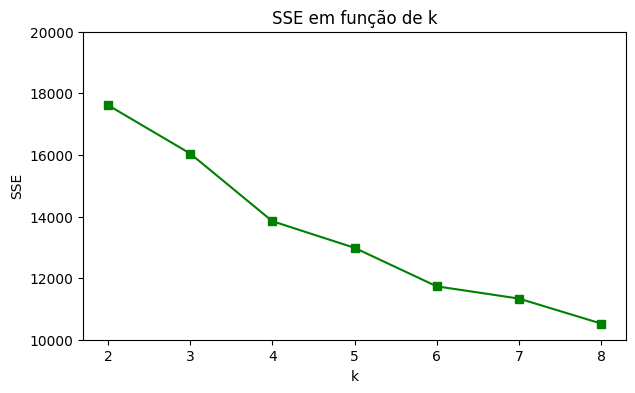

In [10]:
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler


minmax = MinMaxScaler()
norm_data = minmax.fit_transform(x)

erro = []

for i in range(2, 9):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42, max_iter=500)
    kmeans.fit(norm_data)
    erro.append(kmeans.inertia_)

print(erro)

plt.figure(figsize=(7, 4))
plt.plot(range(2, 9), erro, marker='s', color='green')
plt.title("SSE em função de k")
plt.xlabel("k")
plt.ylabel("SSE")
plt.ylim(10000, 20000)
plt.show()



<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [1.5v] According to the previous plot, how many underlying customer segments
(clusters) should there be? Explain based on the trade-off between the clusters and
inertia.

Analisando o gráfico e usando o método "elbow finding", o k onde o declive estabiliza é k=4 e por isso devem existir 4 clusters. Aumentando o número de clusters, a inércia diminui, no entanto, corremos o risco de overfitting do modelo à training data e o modelo também se torna mais complexo, sem aumentar substancialmente o desempenho. Devemos escolher por isso o nº de clusters que mais diminui a inércia sem aumentar demasiado a complexidade do modelo.

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. [1.5v] Would k-modes be a better clustering approach? Explain why based on the
dataset features.


Sim, o k-modes é uma opção melhor já que o dataset pussui muitas features categóricas, e k-means obriga algumas destas a ser representadas em variáveis binárias o que pode afetar negativamente as distâncias. Enquanto que o k-mean usa medidas de distância que resultam melhor para dados numéricos, o k-mode foi feito para features categóricas usando um procedimento baseado na frequência para atualizar os clusters e distancia de Hamming para calcular distâncias, evitando que as variáveis categóricas como "job" tenham de ser transformadas.

<h4> 2. Normalize the data using StandardScaler

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [1v] Apply PCA to the data. How much variability is explained by the top 2
components?

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std = StandardScaler()
norm_data = std.fit_transform(x)

pca = PCA(n_components=2)
pca_data = pca.fit(norm_data)
print(pca_data.explained_variance_ratio_)


AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

Os top 2 componentes explicam 11,68% e 11,08% da variância

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. [1v] Apply k-means clustering with k=3 and random_state=42 (all other
arguments as default) and use the original 8 features. Next, provide a scatterplot
according to the first 2 principal components. Can we clearly separate the clusters?
Justify.

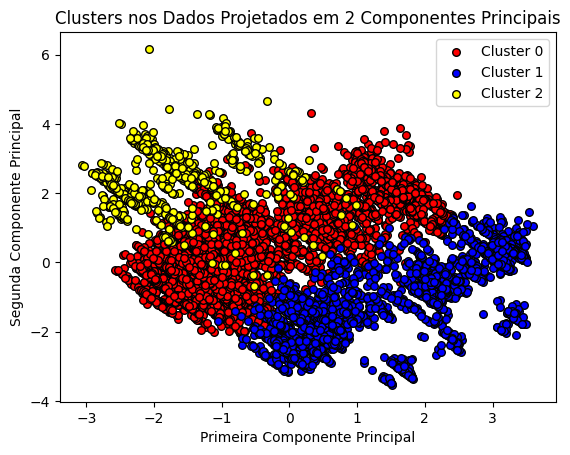

In [12]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(norm_data)
pca_data = pca_data.transform(norm_data)
colors = ['red', 'blue', 'yellow']
for i in range(3):  
    plt.scatter(
        pca_data[clusters == i, 0],  
        pca_data[clusters == i, 1],  
        color=colors[i],            
        label=f'Cluster {i}',
        edgecolor='k',               
        s=30                       
    )
plt.xlabel("Primeira Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.title("Clusters nos Dados Projetados em 2 Componentes Principais")
plt.legend() 
plt.show()

Existe uma separação clara entre os clusters porque as duas primeiras componentes principais capturam a maior parte da variação dos dados, incluindo as diferenças que o 
k-means utilizou para gerar os clusters.

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. [2v] Plot the cluster conditional features of the frequencies of “job” and ”education”
according to the clusters obtained in the previous question (2b.). Use sns.displot
(see Data Exploration notebook),with multiple="dodge",stat='density',
shrink=0.8 and common_norm=False. Describe the main differences between the
clusters in no more than half a page.

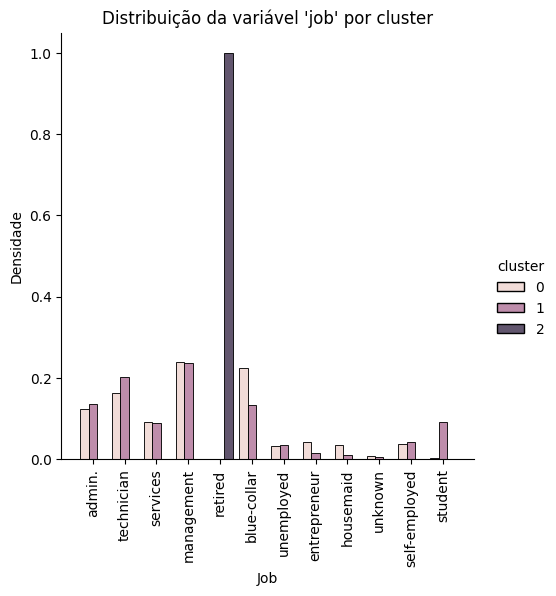

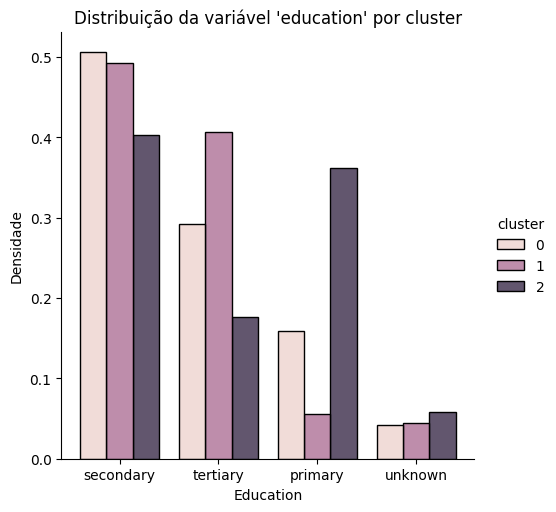

In [13]:
x_0['cluster'] = clusters  # Clusters obtidos do KMeans

# Plot das frequências de "job" por cluster
sns.displot(
    data=x_0, x="job", hue="cluster", multiple="dodge",
    stat="density", shrink=0.8, common_norm=False
)
plt.title("Distribuição da variável 'job' por cluster")
plt.xlabel("Job")
plt.ylabel("Densidade")
plt.xticks(rotation=90)
plt.show()

# Plot das frequências de "education" por cluster
sns.displot(
    data=x_0, x="education", hue="cluster", multiple="dodge",
    stat="density", shrink=0.8, common_norm=False
)
plt.title("Distribuição da variável 'education' por cluster")
plt.xlabel("Education")
plt.ylabel("Densidade")
plt.show()


Após observar os gráficos de distribuição para as variáveis “job” e “education” por cluster, podemos identificar diferenças principais:

Distribuição de "job": Cada cluster apresenta diferentes concentrações em tipos de trabalho específicos, o que sugere que o tipo de emprego pode ser uma característica relevante para segmentação de clientes. Por exemplo, o Cluster 1 pode ter uma proporção maior de clientes com ocupações de alta qualificação, enquanto o Cluster 2 pode concentrar clientes em cargos administrativos.

Distribuição de "education": A variável “education” também mostra diferenças notáveis entre clusters. Podemos observar que um cluster específico tem uma maior concentração de clientes com formação universitária, enquanto outro pode ter uma distribuição mais ampla entre níveis de escolaridade.

Em resumo, as diferenças nas distribuições de “job” e “education” sugerem que os clusters representam grupos de clientes com perfis distintos em termos de ocupação e nível educacional. Isso pode ser útil para estratégias de marketing e ofertas personalizadas, pois reflete a diversidade nas características demográficas dos clientes.